In [1]:
import pandas as pd
import sys

sys.path.append("../Handlers")

from traintest import ConvolutionalNNClassifier, RecurrentNNClassifier, ArtificialNNClassifier

In [2]:
spam = pd.read_csv("./spam.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
spam_label = le.fit_transform(spam["Category"])

In [5]:
metric_results = []

In [ ]:
cnn = ConvolutionalNNClassifier("SMSSpam")
cnn.load_data(spam["Message"], spam_label)
cnn.split(test_size=0.1, valid_size=0.1)
cnn.vectorizing()
cnn.build(
    dense_dropout=True, 
    dense_dropout_rate=0.4, 
    epochs=20,
    conv_layer_num=2,
    num_filters=[128, 64],
    kernel_sizes=[5, 3],
    max_pooling=True,
    pooling_sizes=[2, 0]
)

Shape of the input data is (4456, 200)


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8304 - loss: 0.4498 - precision: 0.3095 - recall: 0.0951 - val_accuracy: 0.9767 - val_loss: 0.0554 - val_precision: 0.9014 - val_recall: 0.9143
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9873 - loss: 0.0467 - precision: 0.9716 - recall: 0.9356 - val_accuracy: 0.9910 - val_loss: 0.0432 - val_precision: 0.9710 - val_recall: 0.9571
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9951 - loss: 0.0184 - precision: 0.9935 - recall: 0.9709 - val_accuracy: 0.9857 - val_loss: 0.0518 - val_precision: 0.9306 - val_recall: 0.9571
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9978 - loss: 0.0052 - precision: 0.9996 - recall: 0.9834 - val_accuracy: 0.9857 - val_loss: 0.0503 - val_precision: 0.9559 - val_recall: 0.9286
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9981 - loss: 0.0053 - precision: 1.0000 - recall: 0.9860 - val_accuracy: 0.9857 - val_lo

CNN SMS Spam Classification Report


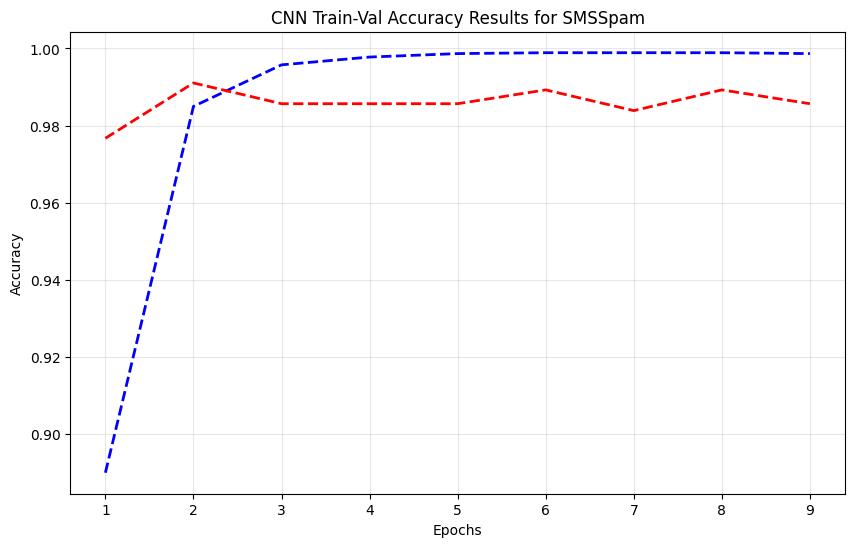

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
{'dataset': 'SMSSpam', 'model': 'CNN', 'metrics': {'accuracy': 0.9802867383512545, 'weighted_precision': 0.9800377140103355, 'wighted_recall': 0.9802867383512545, 'weighted_f1': 0.979987759260237, 'macro_precision': 0.9697779111644658, 'macro_recall': 0.9421126959469002, 'macro_f1': 0.9553518821603928, 'roc_auc': 0.9421126959469003}, 'confusion_matrix': array([[482,   3],
       [  8,  65]], dtype=int64), 'epochs': 9}


In [9]:
print("CNN SMS Spam Classification Report")
cnn.plot_training_validation_accuracy()
metrics = cnn.evaluate()
metric_results.append(metrics)
print(metrics)
del cnn

In [10]:
rnn = RecurrentNNClassifier("SMSSpam")
rnn.load_data(spam["Message"], spam_label)
rnn.split(test_size=0.1, valid_size=0.1)
rnn.vectorizing()
rnn.build(
    hidden_layer_num=2,
    hidden_sizes=[128, 64],
    epochs=20,
    lstm=False
)

Shape of the input data is (4456, 200)
Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.8316 - loss: 0.4608 - precision: 0.1562 - recall: 0.0407 - val_accuracy: 0.8746 - val_loss: 0.3796 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.8697 - loss: 0.3909 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8746 - val_loss: 0.3783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.8588 - loss: 0.4089 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8746 - val_loss: 0.3789 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - accuracy: 0.8644 - loss: 0.4005 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8746 - val_loss: 0.3797 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.8669 - loss: 0.3932 - precision: 0

RNN SMS Spam Classification Report


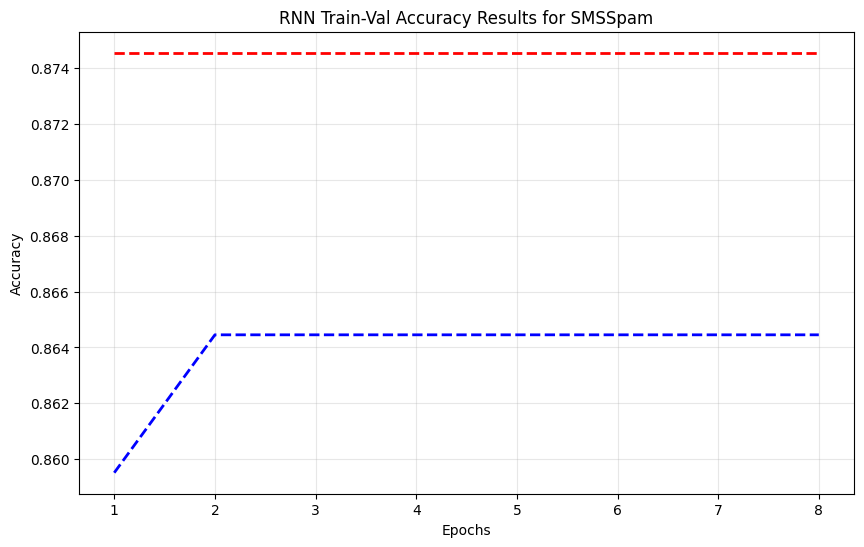

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
{'dataset': 'SMSSpam', 'model': 'RNN', 'metrics': {'accuracy': 0.8691756272401434, 'weighted_precision': 0.7554662709882967, 'wighted_recall': 0.8691756272401434, 'weighted_f1': 0.8083416667525782, 'macro_precision': 0.4345878136200717, 'macro_recall': 0.5, 'macro_f1': 0.4650047938638543, 'roc_auc': 0.5}, 'confusion_matrix': array([[485,   0],
       [ 73,   0]], dtype=int64), 'epochs': 8}


e:\Python Tests\AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python Tests\AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
print("RNN SMS Spam Classification Report")
rnn.plot_training_validation_accuracy()
metrics = rnn.evaluate()
metric_results.append(metrics)
print(metrics)
del rnn

In [12]:
ann = ArtificialNNClassifier("SMSSpam")
ann.load_data(spam["Message"], spam_label)
ann.split(test_size=0.1, valid_size=0.1)
ann.vectorizing()
ann.build(
    hidden_layer_num=2,
    hidden_layer_sizes=[64, 64],
    epochs=20
)

Shape of the input data is (4456, 200)
Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8265 - loss: 0.4698 - precision: 0.0938 - recall: 0.0274 - val_accuracy: 0.8746 - val_loss: 0.2748 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9269 - loss: 0.1752 - precision: 0.8332 - recall: 0.4396 - val_accuracy: 0.9910 - val_loss: 0.0335 - val_precision: 0.9851 - val_recall: 0.9429
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9908 - loss: 0.0303 - precision: 0.9835 - recall: 0.9437 - val_accuracy: 0.9892 - val_loss: 0.0300 - val_precision: 0.9848 - val_recall: 0.9286
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9967 - loss: 0.0139 - precision: 1.0000 - recall: 0.9760 - val_accuracy: 0.9892 - val_loss: 0.0260 - val_precision: 0.9848 - val_recall: 0.9286
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0034 - precision: 1.0000 - recal

ANN SMS Spam Classification Report


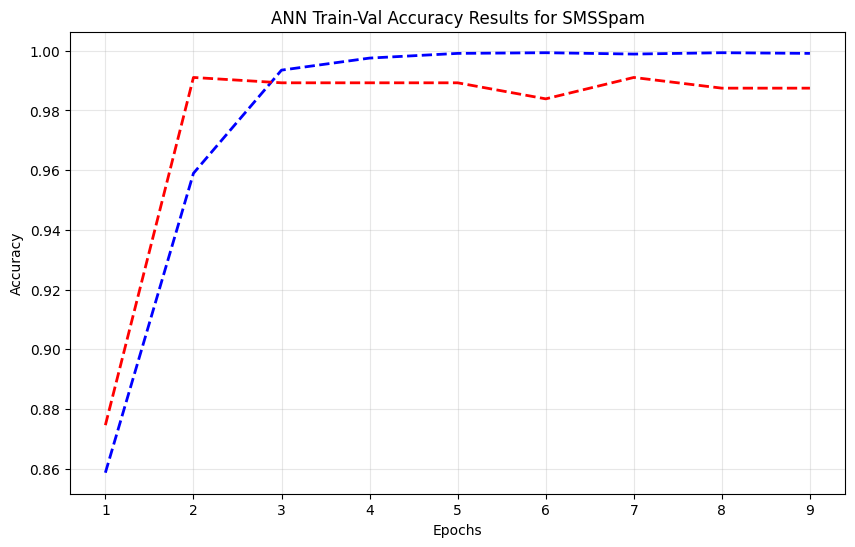

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
{'dataset': 'SMSSpam', 'model': 'ANN', 'metrics': {'accuracy': 0.9802867383512545, 'weighted_precision': 0.9807239276216903, 'wighted_recall': 0.9802867383512545, 'weighted_f1': 0.9795941283429365, 'macro_precision': 0.9889112903225806, 'macro_recall': 0.9246575342465753, 'macro_f1': 0.9536527353041114, 'roc_auc': 0.9246575342465753}, 'confusion_matrix': array([[485,   0],
       [ 11,  62]], dtype=int64), 'epochs': 9}


In [13]:
print("ANN SMS Spam Classification Report")
ann.plot_training_validation_accuracy()
metrics = ann.evaluate()
metric_results.append(metrics)
print(metrics)
del ann

In [14]:
from traintest import add_to_json_array

print(metric_results)

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./enron_classification_nn_report.json", metric_results, mode="overwrite")

[{'dataset': 'SMSSpam', 'model': 'CNN', 'metrics': {'accuracy': 0.9802867383512545, 'weighted_precision': 0.9800377140103355, 'wighted_recall': 0.9802867383512545, 'weighted_f1': 0.979987759260237, 'macro_precision': 0.9697779111644658, 'macro_recall': 0.9421126959469002, 'macro_f1': 0.9553518821603928, 'roc_auc': 0.9421126959469003}, 'confusion_matrix': array([[482,   3],
       [  8,  65]], dtype=int64), 'epochs': 9}, {'dataset': 'SMSSpam', 'model': 'RNN', 'metrics': {'accuracy': 0.8691756272401434, 'weighted_precision': 0.7554662709882967, 'wighted_recall': 0.8691756272401434, 'weighted_f1': 0.8083416667525782, 'macro_precision': 0.4345878136200717, 'macro_recall': 0.5, 'macro_f1': 0.4650047938638543, 'roc_auc': 0.5}, 'confusion_matrix': array([[485,   0],
       [ 73,   0]], dtype=int64), 'epochs': 8}, {'dataset': 'SMSSpam', 'model': 'ANN', 'metrics': {'accuracy': 0.9802867383512545, 'weighted_precision': 0.9807239276216903, 'wighted_recall': 0.9802867383512545, 'weighted_f1': 0.97